# Final Year Project System (Loke Weng Khay - TP062166)
## Heart Disease Prediction System

### Import Libraries

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from matplotlib import rcParams
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

### Import Dataset 1

In [2]:
df = pd.read_csv('C:\\Users\\vince\\Desktop\\FYP Testing\\Final_System\\heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Import Dataset 2

In [3]:
df2 = pd.read_csv('C:\\Users\\vince\\Desktop\\FYP Testing\\Final_System\\heart2.csv')
df2=df2.set_axis(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol',
       'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak',
       'ST_Slope', 'CA', 'THAL','HeartDisease'], axis=1, inplace=False)
df2.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,CA,THAL,HeartDisease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Data Exploration 

#### General Overview of Datasets

In [4]:
print("Shape of dataset 1:", df.shape)
print("Columns:", df.columns)

Shape of dataset 1: (918, 12)
Columns: Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


In [5]:
print("Shape of dataset 2:", df2.shape)
print("Columns:", df2.columns)

Shape of dataset 2: (1025, 14)
Columns: Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'CA',
       'THAL', 'HeartDisease'],
      dtype='object')


#### Summary of Dataset 

In [6]:
print("Summary of Heart Disease dataset 1:")
df.info()

Summary of Heart Disease dataset 1:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
print("Summary of Heart Disease dataset 2:")
df2.info()

Summary of Heart Disease dataset 2:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             1025 non-null   int64  
 1   Sex             1025 non-null   int64  
 2   ChestPainType   1025 non-null   int64  
 3   RestingBP       1025 non-null   int64  
 4   Cholesterol     1025 non-null   int64  
 5   FastingBS       1025 non-null   int64  
 6   RestingECG      1025 non-null   int64  
 7   MaxHR           1025 non-null   int64  
 8   ExerciseAngina  1025 non-null   int64  
 9   Oldpeak         1025 non-null   float64
 10  ST_Slope        1025 non-null   int64  
 11  CA              1025 non-null   int64  
 12  THAL            1025 non-null   int64  
 13  HeartDisease    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


#### Check for Missing Data

In [8]:
print("Missing Value from Heart Disease dataset 1:")
df.isna().sum()

Missing Value from Heart Disease dataset 1:


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [9]:
print("Missing Value from Heart Disease dataset 2:")
df2.isna().sum()

Missing Value from Heart Disease dataset 2:


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
CA                0
THAL              0
HeartDisease      0
dtype: int64

#### Standard Deviation of Dataset 

In [10]:
df.std(axis=0)

C:\Users\vince\AppData\Local\Temp\ipykernel_1588\649938150.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std(axis=0)


Age               9.432617
RestingBP        18.514154
Cholesterol     109.384145
FastingBS         0.423046
MaxHR            25.460334
Oldpeak           1.066570
HeartDisease      0.497414
dtype: float64

In [11]:
df2.std(axis=0)

Age                9.072290
Sex                0.460373
ChestPainType      1.029641
RestingBP         17.516718
Cholesterol       51.592510
FastingBS          0.356527
RestingECG         0.527878
MaxHR             23.005724
ExerciseAngina     0.472772
Oldpeak            1.175053
ST_Slope           0.617755
CA                 1.030798
THAL               0.620660
HeartDisease       0.500070
dtype: float64

### Data Pre-Processing 

#### Delete unwanted columns and combine both datasets into one dataset

In [12]:
del df2['CA']
del df2['THAL']

In [13]:
df2['Sex'] = df2['Sex'].map(
                   {1:'M' ,0:'F'})

df2['ChestPainType'] = df2['ChestPainType'].map(
                   {0:'TA', 1:'ATA' ,2:'NAP',3:'ASY'})

df2['RestingECG'] = df2['RestingECG'].map(
                   {0:'Normal' ,1:'ST',2:'LVH'})

df2['ExerciseAngina'] = df2['ExerciseAngina'].map(
                   {0:'N' ,1:'Y'})

df2['ST_Slope'] = df2['ST_Slope'].map(
                   {0:'Up' ,1:'Flat',2:'Down'})


In [14]:
df3 = df.append(df2)
display(df3)

C:\Users\vince\AppData\Local\Temp\ipykernel_1588\2007774362.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df.append(df2)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,M,ATA,140,221,0,ST,164,Y,0.0,Down,1
1021,60,M,TA,125,258,0,Normal,141,Y,2.8,Flat,0
1022,47,M,TA,110,275,0,Normal,118,Y,1.0,Flat,0
1023,50,F,TA,110,254,0,Normal,159,N,0.0,Down,1


#### Remove Duplicate Data 

In [15]:
print("Duplicate found before duplicates dropped = ", df3.duplicated().sum())

Duplicate found before duplicates dropped =  723


In [16]:
df3 = df3.drop_duplicates(keep='first')

In [17]:
print("Duplicate found after duplicates dropped = ", df3.duplicated().sum())

Duplicate found after duplicates dropped =  0


#### Converting non-numerical data into numerical data 

In [18]:
df3['Sex'] = df3['Sex'].map(
                   {'M':1 ,'F':2})

df3['ChestPainType'] = df3['ChestPainType'].map(
                   {'ATA':1 ,'NAP':2,'ASY':3,'TA':4})

df3['RestingECG'] = df3['RestingECG'].map(
                   {'Normal':1 ,'ST':2,'LVH':3})

df3['ExerciseAngina'] = df3['ExerciseAngina'].map(
                   {'N':1 ,'Y':2})

df3['ST_Slope'] = df3['ST_Slope'].map(
                   {'Up':1 ,'Flat':2,'Down':3})

####  Imputing Null Cholesterol variables using KNN Imputer

In [19]:
count = (df3['Cholesterol'] == 0).sum()
print('Count of zeros in Cholesterol Column: ', count)

Count of zeros in Cholesterol Column:  172


In [20]:
df3['Cholesterol']=df3['Cholesterol'].replace(0, np.nan)
imputer = KNNImputer(n_neighbors=5)
df3 = pd.DataFrame(imputer.fit_transform(df3),columns = df3.columns)

#### Remove Unrealistic Variable Range for OldPeak

In [21]:
count2 = (df3['Oldpeak'] < 0).sum()
print('Count of negative variables in Oldpeak Column: ', count2)

Count of negative variables in Oldpeak Column:  13


In [22]:
df3.Oldpeak[df3.Oldpeak <0] = 0

#### Cleaned Heart Disease Dataset 

In [23]:
df3

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,1.0,1.0,140.0,289.0,0.0,1.0,172.0,1.0,0.0,1.0,0.0
1,49.0,2.0,2.0,160.0,180.0,0.0,1.0,156.0,1.0,1.0,2.0,1.0
2,37.0,1.0,1.0,130.0,283.0,0.0,2.0,98.0,1.0,0.0,1.0,0.0
3,48.0,2.0,3.0,138.0,214.0,0.0,1.0,108.0,2.0,1.5,2.0,1.0
4,54.0,1.0,2.0,150.0,195.0,0.0,1.0,122.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1215,68.0,2.0,2.0,120.0,211.0,0.0,1.0,115.0,1.0,1.5,2.0,1.0
1216,44.0,2.0,2.0,108.0,141.0,0.0,2.0,175.0,1.0,0.6,2.0,1.0
1217,52.0,1.0,4.0,128.0,255.0,0.0,2.0,161.0,2.0,0.0,3.0,0.0
1218,59.0,1.0,3.0,160.0,273.0,0.0,1.0,125.0,1.0,0.0,3.0,0.0


### Data Visualization 

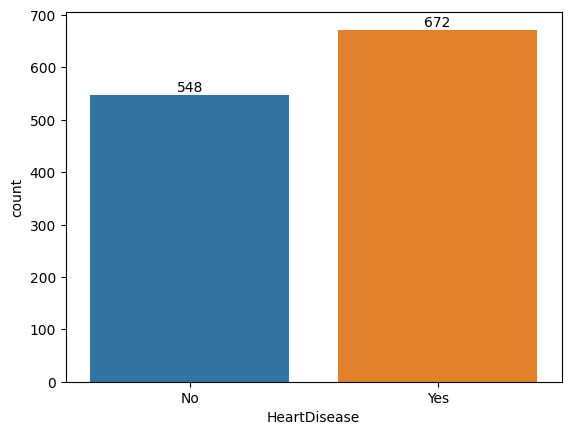

In [24]:
ax = sns.countplot(x='HeartDisease', data=df3)
plt.gca().set_xticklabels(labels=["No","Yes"])
for container in ax.containers:
    ax.bar_label(container)

In [25]:
print(df3.HeartDisease.value_counts())
print()
print(round(df3.HeartDisease.value_counts(normalize=True),2)*100)

1.0    672
0.0    548
Name: HeartDisease, dtype: int64

1.0    55.0
0.0    45.0
Name: HeartDisease, dtype: float64


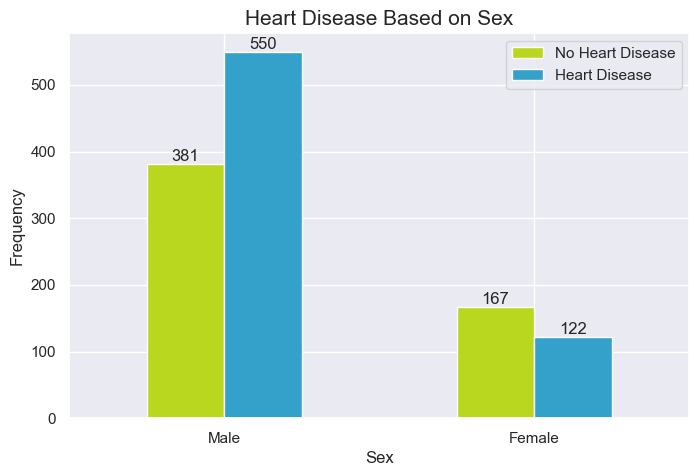

In [26]:
sns.set(style="darkgrid")
ax1=pd.crosstab(df3.Sex, df3.HeartDisease)
bar1=ax1.plot(kind="bar", figsize=(8,5), color=['#BAD720',"#33A1C9"], ax=plt.gca())
plt.legend(["No Heart Disease", "Heart Disease"])
plt.title("Heart Disease Based on Sex",fontsize=15)
plt.xlabel("Sex",fontsize=12)
plt.xticks(rotation=0)
plt.gca().set_xticklabels(labels=["Male","Female"])
plt.ylabel("Frequency",fontsize=12)
for c in bar1.containers:
    # set the bar label
    bar1.bar_label(c, label_type='edge')
plt.show()

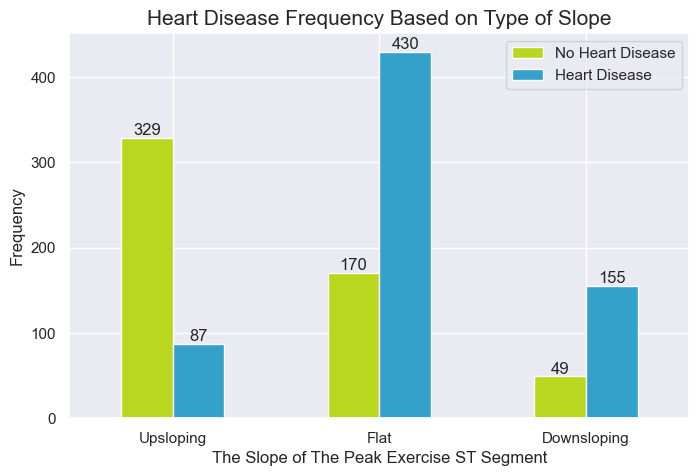

In [27]:
sns.set(style="darkgrid")
ax2=pd.crosstab(df3.ST_Slope, df3.HeartDisease)
bar2=ax2.plot(kind="bar", figsize=(8,5), color=['#BAD720',"#33A1C9"], ax=plt.gca())
plt.legend(["No Heart Disease", "Heart Disease"])
plt.title("Heart Disease Frequency Based on Type of Slope",fontsize=15)
plt.xlabel("The Slope of The Peak Exercise ST Segment",fontsize=12)
plt.xticks(rotation=0)
plt.gca().set_xticklabels(labels=["Upsloping","Flat","Downsloping"])
plt.ylabel("Frequency",fontsize=12)
for c in bar2.containers:
    # set the bar label
    bar2.bar_label(c, label_type='edge')
plt.show() 

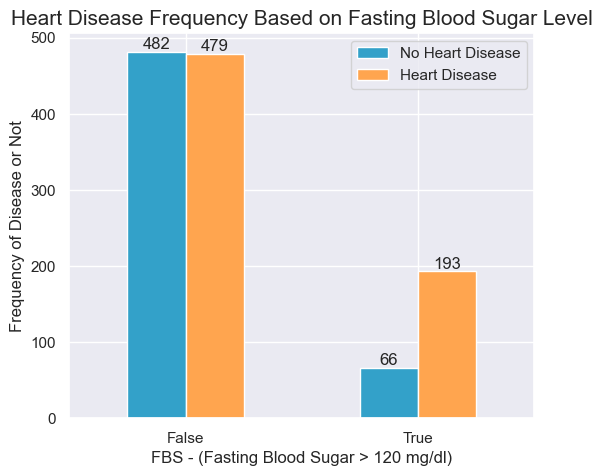

In [28]:
sns.set(style="darkgrid")
ax3=pd.crosstab(df3.FastingBS, df3.HeartDisease)
bar3=ax3.plot(kind="bar", figsize=(6,5), color=["#33A1C9", "#FFA54F"], ax=plt.gca())
plt.title("Heart Disease Frequency Based on Fasting Blood Sugar Level",fontsize=15)
plt.legend(["No Heart Disease", "Heart Disease"])
plt.xlabel("FBS - (Fasting Blood Sugar > 120 mg/dl)",fontsize=12)
plt.gca().set_xticklabels(labels=["False", "True"])
plt.xticks(rotation=0)
plt.ylabel("Frequency of Disease or Not",fontsize=12)
for c in bar3.containers:
    # set the bar label
    bar3.bar_label(c, label_type='edge')
plt.show()

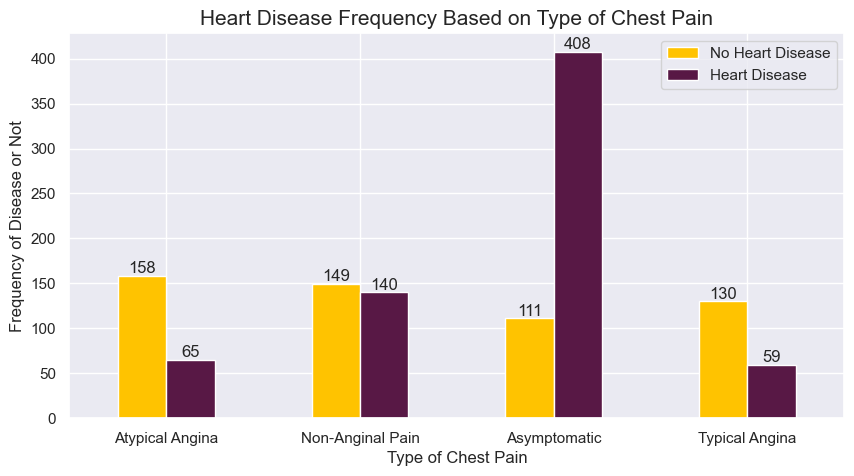

In [29]:
sns.set(style="darkgrid")
ax4=pd.crosstab(df3.ChestPainType, df3.HeartDisease)
bar4=ax4.plot(kind="bar", figsize=(10, 5), color=["#FFC300", "#581845"], ax=plt.gca())
plt.title("Heart Disease Frequency Based on Type of Chest Pain",fontsize=15)
plt.legend(["No Heart Disease", "Heart Disease"])
plt.xlabel("Type of Chest Pain",fontsize=12)
plt.gca().set_xticklabels(labels=["Atypical Angina","Non-Anginal Pain","Asymptomatic","Typical Angina"])
plt.xticks(rotation=0)
plt.ylabel("Frequency of Disease or Not",fontsize=12)
for c in bar4.containers:
    # set the bar label
    bar4.bar_label(c, label_type='edge')
plt.show()

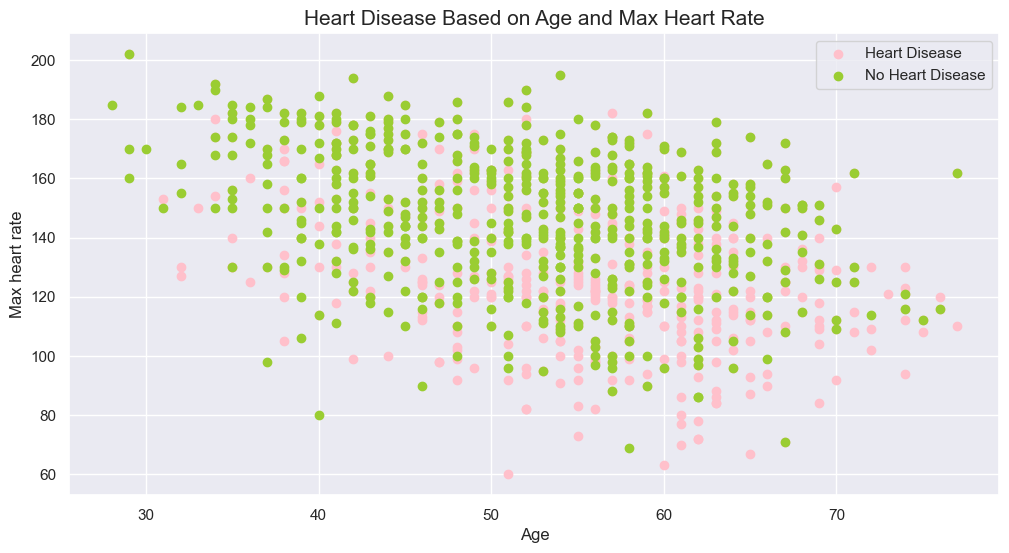

In [30]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,6))

plt.scatter(df3.Age[df3.HeartDisease==1], df3.MaxHR[df3.HeartDisease==1],color='pink')
plt.scatter(df3.Age[df3.HeartDisease==0], df3.MaxHR[df3.HeartDisease==0],color='yellowgreen')

plt.title('Heart Disease Based on Age and Max Heart Rate',fontsize=15)
plt.xlabel('Age',fontsize=12)
plt.ylabel('Max heart rate',fontsize=12)
plt.legend(['Heart Disease','No Heart Disease']);

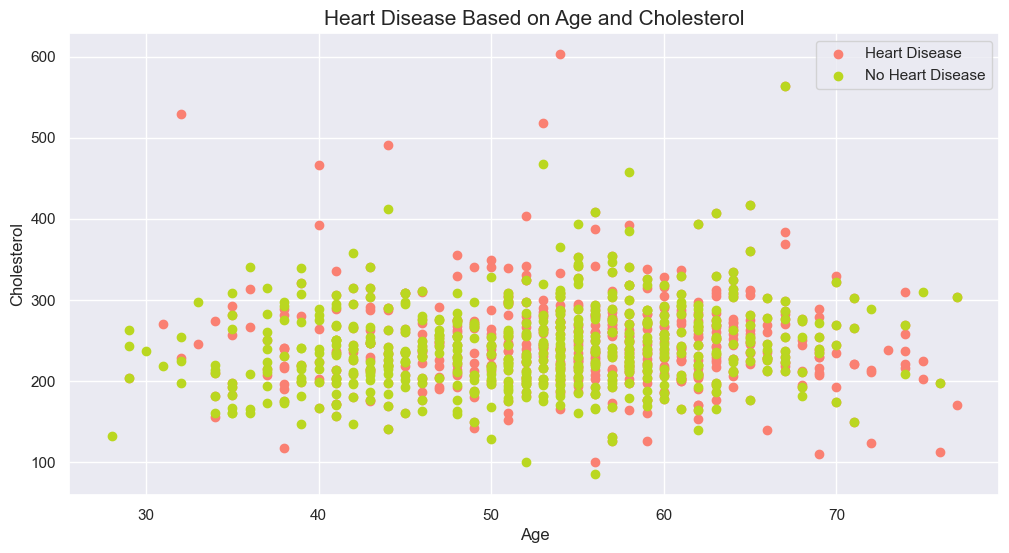

In [31]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,6))

plt.scatter(df3.Age[df3.HeartDisease==1], df3.Cholesterol[df3.HeartDisease==1],color='salmon')
plt.scatter(df3.Age[df3.HeartDisease==0], df3.Cholesterol[df3.HeartDisease==0],color='#BAD720')

plt.title('Heart Disease Based on Age and Cholesterol',fontsize=15)
plt.xlabel('Age',fontsize=12)
plt.ylabel('Cholesterol',fontsize=12)
plt.legend(['Heart Disease','No Heart Disease']);

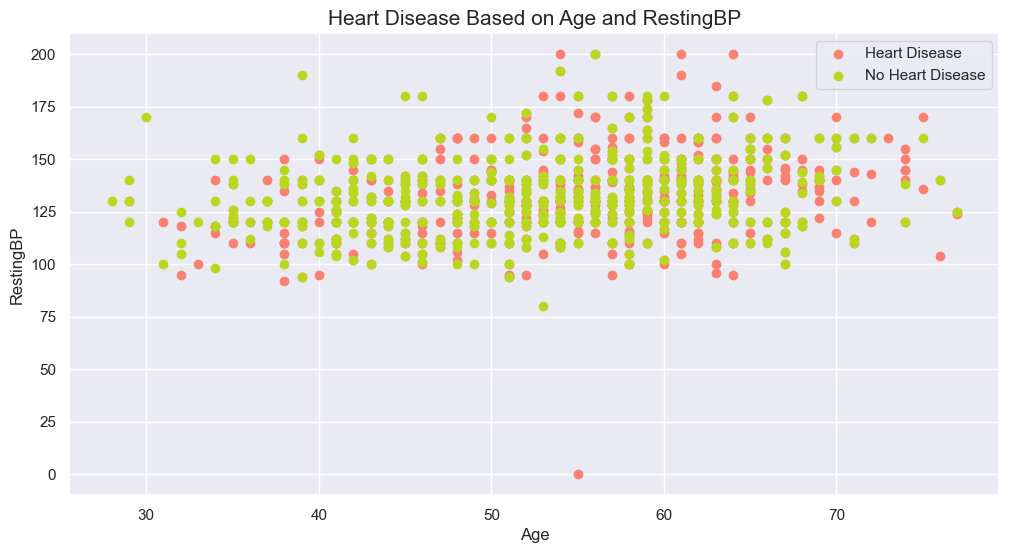

In [32]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,6))

plt.scatter(df3.Age[df3.HeartDisease==1], df3.RestingBP[df3.HeartDisease==1],color='salmon')
plt.scatter(df3.Age[df3.HeartDisease==0], df3.RestingBP[df3.HeartDisease==0],color='#BAD720')

plt.title('Heart Disease Based on Age and RestingBP',fontsize=15)
plt.xlabel('Age',fontsize=12)
plt.ylabel('RestingBP',fontsize=12)
plt.legend(['Heart Disease','No Heart Disease']);

In [33]:
# sns.set(style="darkgrid")
# pd.crosstab(df3.Age, df3.HeartDisease).plot(kind="bar", figsize=(20, 6), ax=plt.gca())
# plt.title("Heart Disease vs Age",fontsize=20)
# plt.legend(["No Heart Disease", "Heart Disease"])
# plt.xlabel("Age",fontsize=15)
# plt.ylabel("Frequency",fontsize=15)
# plt.show()

C:\Users\vince\AppData\Local\Temp\ipykernel_1588\1133214140.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['HeartDisease'] = df4['HeartDisease'].map(


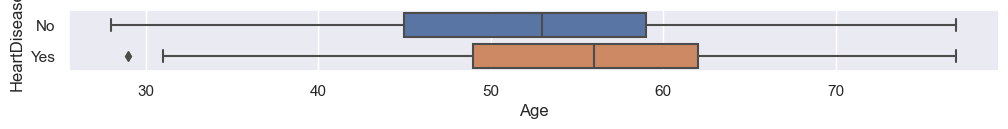

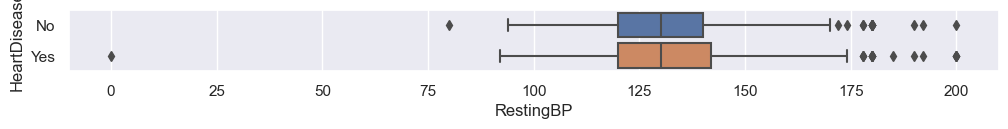

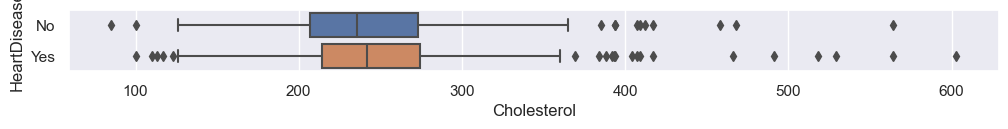

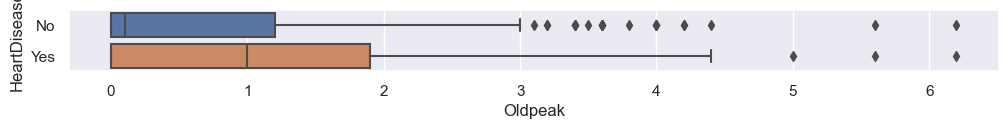

In [34]:
df4=df3[['Age','RestingBP','Cholesterol','Oldpeak','HeartDisease']]
df4['HeartDisease'] = df4['HeartDisease'].map(
                   {1.0:'Yes' ,0.0:'No'})
for column in df4:
    if column!= 'HeartDisease':
        plt.figure(figsize=(12,0.8))
        sns.boxplot(data=df4, x=column,y='HeartDisease')

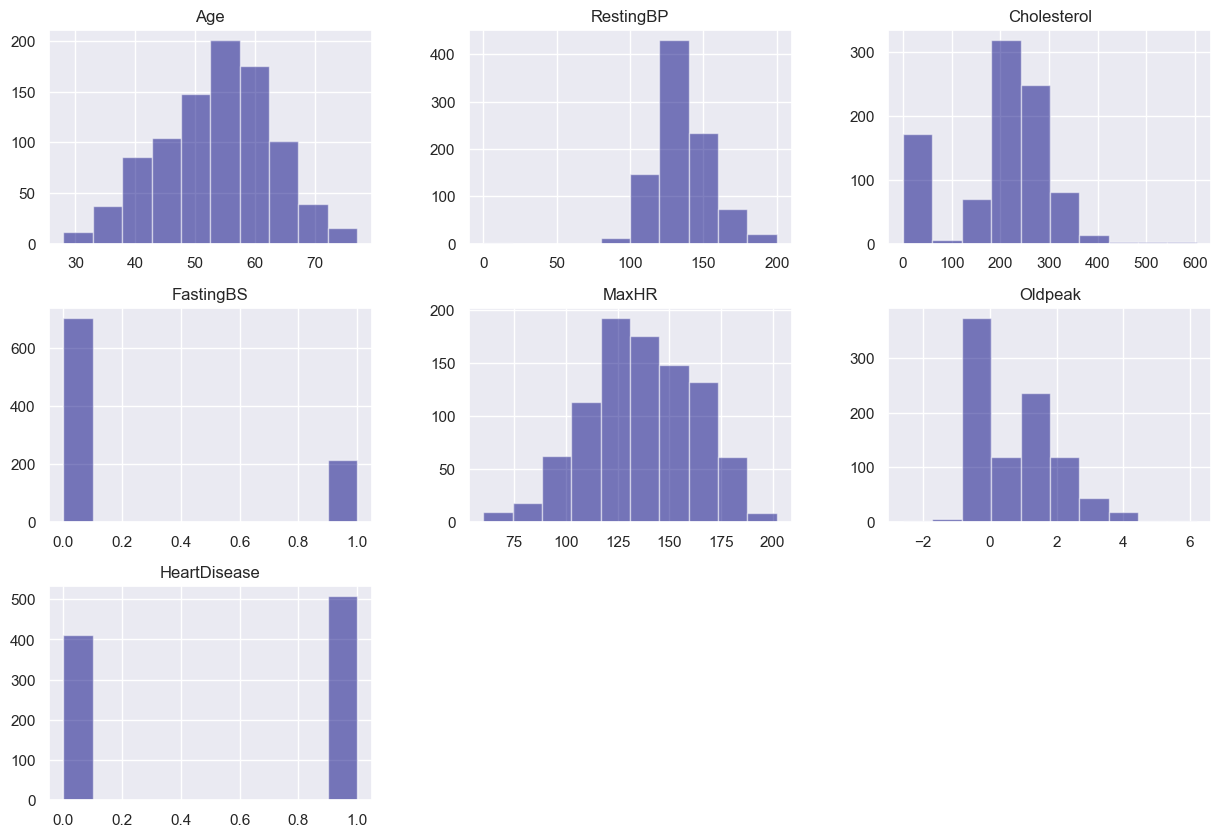

In [35]:
sns.set(style="darkgrid")
df.hist(bins=10,figsize=(15,10) ,color = 'navy', alpha = 0.5)
plt.show()

### Development of Machine Learning Models 

In [36]:
y = df3.HeartDisease
x = df3.drop('HeartDisease', axis=1)

#### Split Dataset

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#### Machine Learning 1: Random Forest 

In [38]:
# Training of Random Forest
RF = RandomForestClassifier(n_jobs=-1, random_state=42)
RF_t0 = time.time()
RF.fit(x_train,y_train)
RF_t1 = time.time()
prediction_linear_RF = RF.predict(x_test)
RF_t2 = time.time()
RF_time_linear_train = RF_t1-RF_t0
RF_time_linear_predict = RF_t2-RF_t1

In [39]:
# Results of Random Forest
print(f'Random Forest Accuracy: {round(RF.score(x_test, y_test)*100,2)}%')
report_RF = classification_report(y_test, prediction_linear_RF, output_dict=True)
print('Heart Disease: ', report_RF['1.0'])
print('No Heart Disease: ', report_RF['0.0'])

Random Forest Accuracy: 81.69%
Heart Disease:  {'precision': 0.8457943925233645, 'recall': 0.8418604651162791, 'f1-score': 0.8438228438228439, 'support': 215}
No Heart Disease:  {'precision': 0.7763157894736842, 'recall': 0.7814569536423841, 'f1-score': 0.778877887788779, 'support': 151}


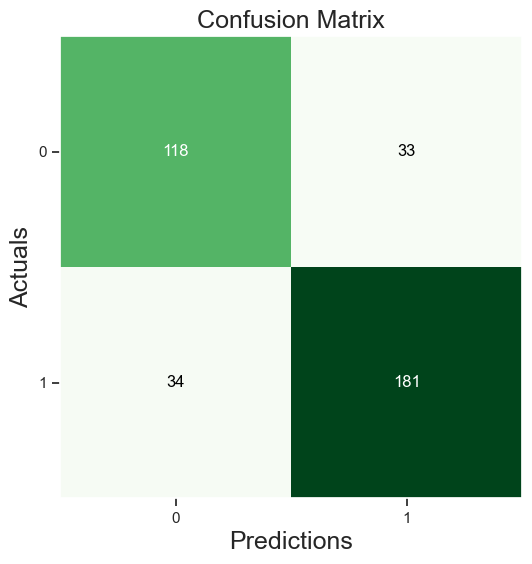

In [40]:
# Performance of Random Forest in Confusion Matrix
conf_matrix_RF = confusion_matrix(y_test, prediction_linear_RF)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix_RF, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#### Machine Learning 2: Decision Tree 

In [41]:
# Training of Decision Tree
DT = DecisionTreeClassifier()
DT_t0 = time.time()
DT.fit(x_train,y_train)
DT_t1 = time.time()
prediction_linear_DT = DT.predict(x_test)
DT_t2 = time.time()
DT_time_linear_train = DT_t1-DT_t0
DT_time_linear_predict = DT_t2-DT_t1

In [42]:
# Results of Decision Tree
print(f'Decision Tree Accuracy: {round(DT.score(x_test, y_test)*100,2)}%')
report_DT = classification_report(y_test, prediction_linear_DT, output_dict=True)
print('Heart Disease: ', report_DT['1.0'])
print('No Heart Disease: ', report_DT['0.0'])

Decision Tree Accuracy: 77.05%
Heart Disease:  {'precision': 0.7963800904977375, 'recall': 0.8186046511627907, 'f1-score': 0.8073394495412843, 'support': 215}
No Heart Disease:  {'precision': 0.7310344827586207, 'recall': 0.7019867549668874, 'f1-score': 0.7162162162162162, 'support': 151}


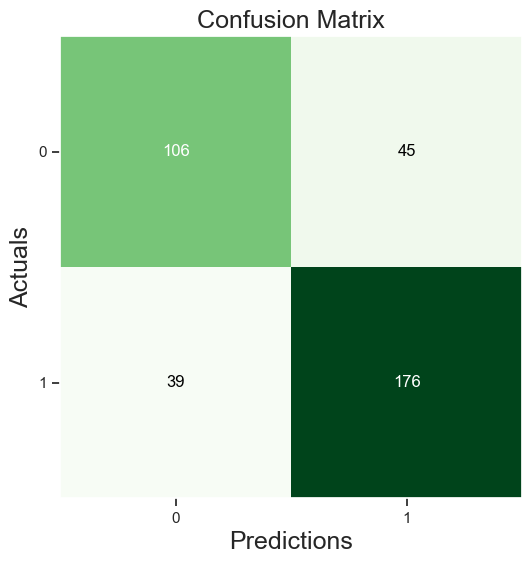

In [43]:
# Performance of Decision Tree in Confusion Matrix
conf_matrix_DT = confusion_matrix(y_test, prediction_linear_DT)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix_DT, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#### Machine Learning 3: Support Vector Machine

In [44]:
# Training of Support Vector Machine
SVM = svm.SVC(kernel='linear', random_state=0)
SVM_t0 = time.time()
SVM.fit(x_train,y_train)
SVM_t1 = time.time()
prediction_linear_SVM = SVM.predict(x_test)
SVM_t2 = time.time()
SVM_time_linear_train = SVM_t1-SVM_t0
SVM_time_linear_predict = SVM_t2-SVM_t1

In [45]:
# Results of Support Vector Machine
print(f'Support Vector Machine Accuracy: {round(SVM.score(x_test, y_test)*100,2)}%')
report_SVM = classification_report(y_test, prediction_linear_SVM, output_dict=True)
print('Heart Disease: ', report_SVM['1.0'])
print('No Heart Disease: ', report_SVM['0.0'])

Support Vector Machine Accuracy: 79.23%
Heart Disease:  {'precision': 0.7982832618025751, 'recall': 0.8651162790697674, 'f1-score': 0.8303571428571429, 'support': 215}
No Heart Disease:  {'precision': 0.7819548872180451, 'recall': 0.6887417218543046, 'f1-score': 0.732394366197183, 'support': 151}


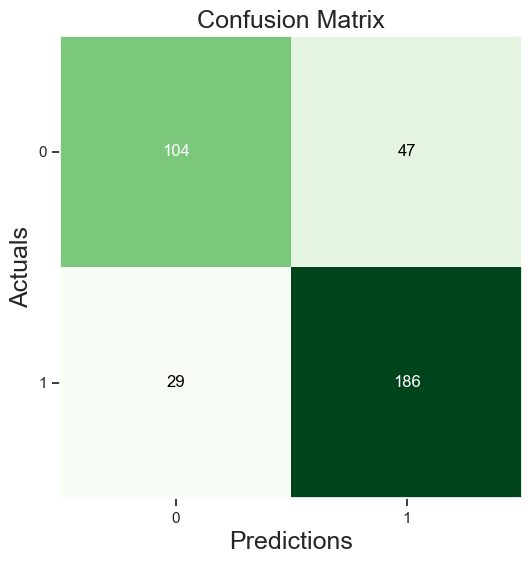

In [46]:
# Performance of Support Vector Machine in Confusion Matrix
conf_matrix_SVM = confusion_matrix(y_test, prediction_linear_SVM)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix_SVM, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#### Machine Learning 4: Naive Bayes

In [47]:
# Training of Naive Bayes
NB = GaussianNB()
NB_t0 = time.time()
NB.fit(x_train, y_train)
NB_t1 = time.time()
prediction_linear_NB = NB.predict(x_test)
NB_t2 = time.time()
NB_time_linear_train = NB_t1-NB_t0
NB_time_linear_predict = NB_t2-NB_t1

In [48]:
# Results of Naive Bayes
print(f'Naive Bayes Accuracy: {round(NB.score(x_test, y_test)*100,2)}%')
report_NB = classification_report(y_test, prediction_linear_NB, output_dict=True)
print('Heart Disease: ', report_NB['1.0'])
print('No Heart Disease: ', report_NB['0.0'])

Naive Bayes Accuracy: 74.32%
Heart Disease:  {'precision': 0.8009950248756219, 'recall': 0.7488372093023256, 'f1-score': 0.7740384615384615, 'support': 215}
No Heart Disease:  {'precision': 0.6727272727272727, 'recall': 0.7350993377483444, 'f1-score': 0.7025316455696202, 'support': 151}


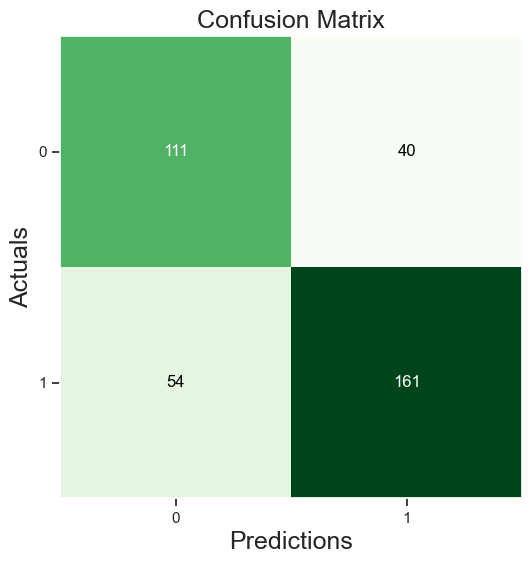

In [49]:
# Performance of Naive Bayes in Confusion Matrix
conf_matrix_NB = confusion_matrix(y_test, prediction_linear_NB)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix_NB, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#### Machine Learning 5: Random Forest Hyparameter Tuning using GridSearchCV

In [50]:
# Declare random forest grid search
grid_RF = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Create a based model
RF2 = RandomForestClassifier()
gridsearch_RF = GridSearchCV(estimator = RF2, param_grid = grid_RF, cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
gridsearch_RF.fit(x_train, y_train)
gridsearch_RF.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 8,
 'n_estimators': 200}

In [51]:
# Get the best random forest model parameters
RF_best_grid = gridsearch_RF.best_estimator_
prediction_linear_Hypertuned_RF = RF_best_grid.predict(x_test)

# Results of Hypera Random Forest
print(f'Hypertuned Random Forest Accuracy: {round(RF_best_grid.score(x_test, y_test)*100,2)}%')
report_Hypertuned_RF = classification_report(y_test, prediction_linear_Hypertuned_RF, output_dict=True)
print('Heart Disease: ', report_Hypertuned_RF['1.0'])
print('No Heart Disease: ', report_Hypertuned_RF['0.0'])

Hypertuned Random Forest Accuracy: 82.51%
Heart Disease:  {'precision': 0.8447488584474886, 'recall': 0.8604651162790697, 'f1-score': 0.8525345622119817, 'support': 215}
No Heart Disease:  {'precision': 0.7959183673469388, 'recall': 0.7748344370860927, 'f1-score': 0.7852348993288589, 'support': 151}


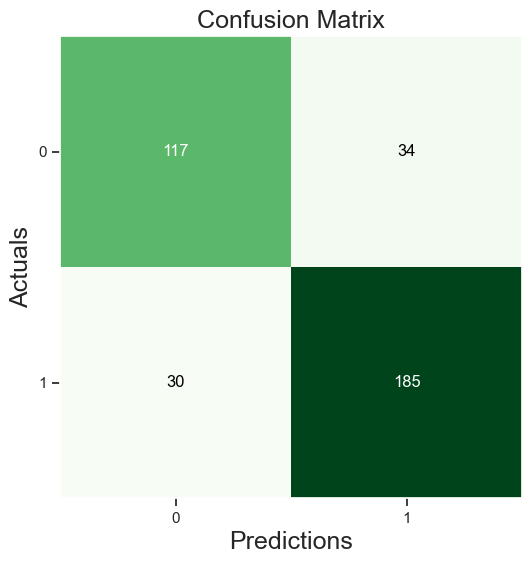

In [52]:
# Performance of Tuned Random Forest in Confusion Matrix
conf_matrix_Hypertuned_RF = confusion_matrix(y_test, prediction_linear_Hypertuned_RF)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix_Hypertuned_RF, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#### Machine Learning 6: Decision Tree Hyparameter Tuning using GridSearchCV

In [53]:
# Declare decision tree grid search
grid_DT = {
    'max_leaf_nodes': list(range(2, 100)), 
    'min_samples_split': [2, 3, 4]
}

# Create a based model
gridSearch_DT = GridSearchCV(DecisionTreeClassifier(random_state=42), grid_DT, verbose=1, cv=3)

# Fit the grid search to the data
gridSearch_DT.fit(x_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [54]:
# Get the best decision tree model parameters
DT_best_grid = gridSearch_DT.best_estimator_
prediction_linear_Hypertuned_DT = DT_best_grid.predict(x_test)

# Results of Hypertuned Decision Tree
print(f'Hypertuned Decision Tree Accuracy: {round(DT_best_grid.score(x_test, y_test)*100,2)}%')
report_Hypertuned_DT = classification_report(y_test, prediction_linear_Hypertuned_DT, output_dict=True)
print('Heart Disease: ', report_Hypertuned_DT['1.0'])
print('No Heart Disease: ', report_Hypertuned_DT['0.0'])

Hypertuned Decision Tree Accuracy: 80.87%
Heart Disease:  {'precision': 0.8280542986425339, 'recall': 0.8511627906976744, 'f1-score': 0.8394495412844036, 'support': 215}
No Heart Disease:  {'precision': 0.7793103448275862, 'recall': 0.7483443708609272, 'f1-score': 0.7635135135135136, 'support': 151}


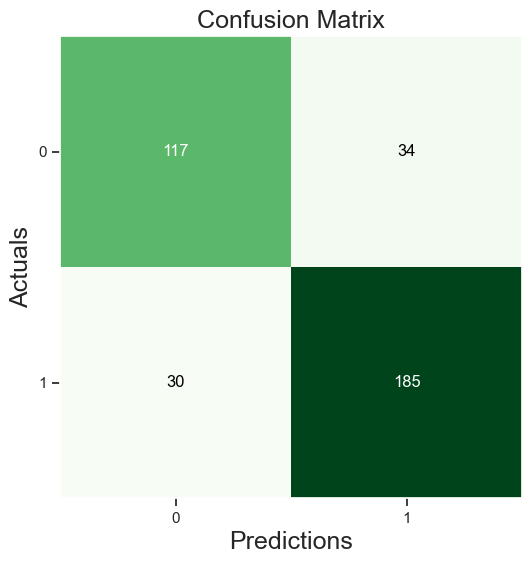

In [55]:
# Performance of Tuned Decision Tree in Confusion Matrix
conf_matrix_Hypertuned_RF = confusion_matrix(y_test, prediction_linear_Hypertuned_RF)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix_Hypertuned_RF, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#### Machine Learning 7: Support Vector Machine Hyparameter Tuning using GridSearchCV

In [56]:
# Declare support vector machine grid search
grid_SVM = {
    'C': [0.1, 1, 10, 100, 1000], 
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
} 

# Create a based model
gridSearch_SVM = GridSearchCV(svm.SVC(), grid_SVM, refit = True, verbose = 3)
  
# Fit the grid search to the data
gridSearch_SVM.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.538 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.538 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.532 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.532 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.535 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.538 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.538 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.532 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.532 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.535 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.538 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.503 total time=   0.0s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.480 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.456 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.392 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.421 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.374 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.400 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.433 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.386 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.433 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.398 total time=   0.0s
[CV 5/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [57]:
# Get the best support vector machine model parameters
SVM_best_grid = gridSearch_SVM.best_estimator_
prediction_linear_Hypertuned_SVM = SVM_best_grid.predict(x_test)

# Results of Hypertuned Support Vector Machine
print(f'Hypertuned Support Vector Machine Accuracy: {round(SVM_best_grid.score(x_test, y_test)*100,2)}%')
report_Hypertuned_SVM = classification_report(y_test, prediction_linear_Hypertuned_SVM, output_dict=True)
print('Heart Disease: ', report_Hypertuned_SVM['1.0'])
print('No Heart Disease: ', report_Hypertuned_SVM['0.0'])

Hypertuned Support Vector Machine Accuracy: 74.86%
Heart Disease:  {'precision': 0.7639484978540773, 'recall': 0.827906976744186, 'f1-score': 0.7946428571428572, 'support': 215}
No Heart Disease:  {'precision': 0.7218045112781954, 'recall': 0.6357615894039735, 'f1-score': 0.676056338028169, 'support': 151}


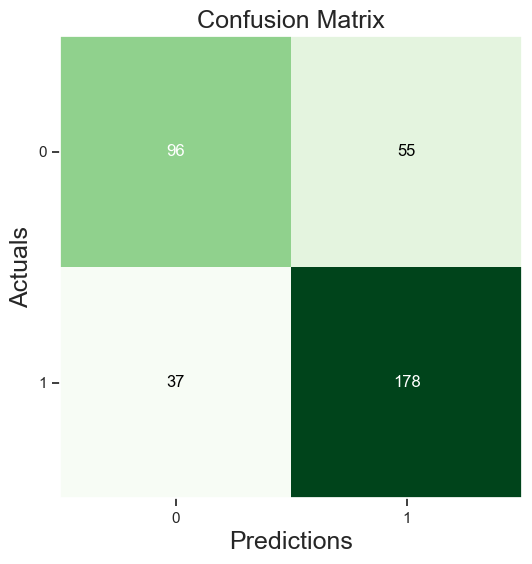

In [58]:
# Performance of Tuned Support Vector Machine in Confusion Matrix
conf_matrix_Hypertuned_SVM = confusion_matrix(y_test, prediction_linear_Hypertuned_SVM)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix_Hypertuned_SVM, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#### Machine Learning 8: Naive Bayes Hyparameter Tuning using GridSearchCV

In [59]:
# Declare naive bayes grid search
grid_NB = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

# Create a based model
grid_NB = GridSearchCV(estimator=GaussianNB(), param_grid=grid_NB, verbose=1, cv=10, n_jobs=-1)

# Fit the grid search to the data
grid_NB.fit(x_train, y_train)
print(grid_NB.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=2.310129700083158e-05)


In [60]:
# Get the best naive bayes model parameters
NB_best_grid = grid_NB.best_estimator_
prediction_linear_Hypertuned_NB = NB_best_grid.predict(x_test)

# Results of Hypertuned Naive Bayes
print(f'Hypertuned Naive Bayes Accuracy: {round(NB_best_grid.score(x_test, y_test)*100,2)}%')
report_Hypertuned_NB = classification_report(y_test, prediction_linear_Hypertuned_NB, output_dict=True)
print('Heart Disease: ', report_Hypertuned_NB['1.0'])
print('No Heart Disease: ', report_Hypertuned_NB['0.0'])

Hypertuned Naive Bayes Accuracy: 72.95%
Heart Disease:  {'precision': 0.7871287128712872, 'recall': 0.7395348837209302, 'f1-score': 0.7625899280575539, 'support': 215}
No Heart Disease:  {'precision': 0.6585365853658537, 'recall': 0.7152317880794702, 'f1-score': 0.6857142857142857, 'support': 151}


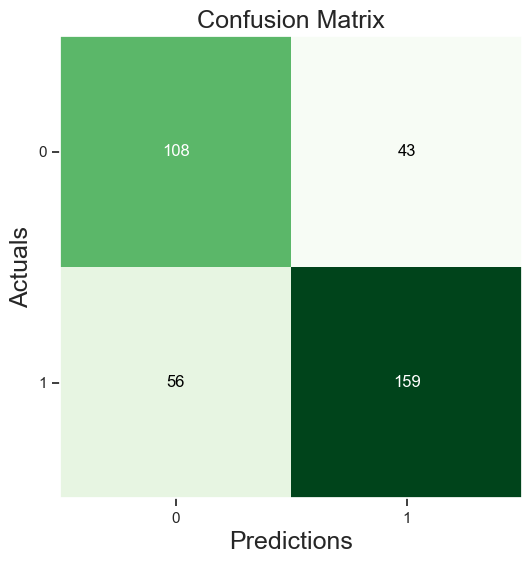

In [61]:
# Performance of Tuned Naive Aabyes in Confusion Matrix
conf_matrix_Hypertuned_NB = confusion_matrix(y_test, prediction_linear_Hypertuned_NB)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix_Hypertuned_NB, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### Summary of all machine learning models 

In [62]:
print('---------------------------------------------------------------------------------------------------------------------')
print('Summary of all machine learning models (Heart Disease)')
print('---------------------------------------------------------------------------------------------------------------------')
print("Training time: %fs; Prediction time: %fs" % (RF_time_linear_train, RF_time_linear_predict))
print(f'Random Forest Accuracy: {round(RF.score(x_test, y_test)*100,2)}%')
print('Heart Disease: ', report_RF['1.0'])
print('No Heart Disease: ', report_RF['0.0'])
print('---------------------------------------------------------------------------------------------------------------------')
print("Training time: %fs; Prediction time: %fs" % (DT_time_linear_train, DT_time_linear_predict))
print(f'Decision Tree Accuracy: {round(DT.score(x_test, y_test)*100,2)}%')
print('Heart Disease: ', report_DT['1.0'])
print('No Heart Disease: ', report_DT['0.0'])
print('---------------------------------------------------------------------------------------------------------------------')
print("Training time: %fs; Prediction time: %fs" % (SVM_time_linear_train, SVM_time_linear_predict))
print(f'Support Vector Machine Accuracy: {round(SVM.score(x_test, y_test)*100,2)}%')
print('Heart Disease: ', report_SVM['1.0'])
print('No Heart Disease: ', report_SVM['0.0'])
print('---------------------------------------------------------------------------------------------------------------------')
print("Training time: %fs; Prediction time: %fs" % (NB_time_linear_train, NB_time_linear_predict))
print(f'Naive Bayes Accuracy: {round(NB.score(x_test, y_test)*100,2)}%')
print('Heart Disease: ', report_NB['1.0'])
print('No Heart Disease: ', report_NB['0.0'])
print('---------------------------------------------------------------------------------------------------------------------')
print(f'Hypertuned Random Forest Accuracy: {round(RF_best_grid.score(x_test, y_test)*100,2)}%')
print('Heart Disease: ', report_Hypertuned_RF['1.0'])
print('No Heart Disease: ', report_Hypertuned_RF['0.0'])
print('---------------------------------------------------------------------------------------------------------------------')
print(f'Hypertuned Decision Tree Accuracy: {round(DT_best_grid.score(x_test, y_test)*100,2)}%')
print('Heart Disease: ', report_Hypertuned_DT['1.0'])
print('No Heart Disease: ', report_Hypertuned_DT['0.0'])
print('---------------------------------------------------------------------------------------------------------------------')
print(f'Hypertuned Support Vector Machine Accuracy: {round(SVM_best_grid.score(x_test, y_test)*100,2)}%')
print('Heart Disease: ', report_Hypertuned_SVM['1.0'])
print('No Heart Disease: ', report_Hypertuned_SVM['0.0'])
print('---------------------------------------------------------------------------------------------------------------------')
print(f'Hypertuned Naive Bayes Accuracy: {round(NB_best_grid.score(x_test, y_test)*100,2)}%')
print('Heart Disease: ', report_Hypertuned_NB['1.0'])
print('No Heart Disease: ', report_Hypertuned_NB['0.0'])
print('---------------------------------------------------------------------------------------------------------------------')

---------------------------------------------------------------------------------------------------------------------
Summary of all machine learning models (Heart Disease)
---------------------------------------------------------------------------------------------------------------------
Training time: 0.339666s; Prediction time: 0.064692s
Random Forest Accuracy: 81.69%
Heart Disease:  {'precision': 0.8457943925233645, 'recall': 0.8418604651162791, 'f1-score': 0.8438228438228439, 'support': 215}
No Heart Disease:  {'precision': 0.7763157894736842, 'recall': 0.7814569536423841, 'f1-score': 0.778877887788779, 'support': 151}
---------------------------------------------------------------------------------------------------------------------
Training time: 0.012424s; Prediction time: 0.003629s
Decision Tree Accuracy: 77.05%
Heart Disease:  {'precision': 0.7963800904977375, 'recall': 0.8186046511627907, 'f1-score': 0.8073394495412843, 'support': 215}
No Heart Disease:  {'precision': 0.73

### Export the best machine learning into a file 

In [64]:
# Saving model to current directory
# Pickle serializes objects so they can be saved to a file, and loaded in a program again later on.
pickle.dump(RF_best_grid, open('Hyperparameter_Tuning_Random_Forest_Heart_Diseases.pkl','wb'))